# Dicionário de Variáveis

- PassengerID: Número de identificação do passageiro;
- Survived: Informa se o passageiro sobreviveu ao naufrágio (0 = não e 1 = sim).
- PCclass: Classe do bilhete (1 = 1ª classe; 2 = 2ª classe e 3 = 3ª classe);
- Name: Nome do passageiro;
- Sex: Sexo do passageiro;
- Age: Idade do passageiro;
- SibSp: Quantidade de cônjuges e/ou irmãos a bordo;
- Parch: Quantidade de pais e filhos a bordo;
- Ticket: Número da passagem;
- Fare: Preço da passagem;
- Cabin: Número da cabine do passageiro;
- Embarked: Porto de embarque: (C = Cherbourg; Q = Queenstown; S = Southampton);

# Bibliotecas

In [105]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import wordcloud
from wordcloud import WordCloud, STOPWORDS

# Carregando Dados

In [106]:
df = pd.read_csv("dataset/train.csv", index_col = "PassengerId")
df.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


# Análise Exploratória

## Análise Geral

- Tipo dos dados

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


- Sumário Estatístico

In [108]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- Valores Nulos

In [109]:
print(df.isnull().sum())

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64


## Função de Exploração

In [110]:
def exploration(col, target, cat = True, box = False):
    if cat:
        sns.barplot(x = col, y = target)
        plt.show()
    else:
        sns.displot(x = col, col = target, kde = True)
        plt.show()
    if box:
        sns.boxplot(x = target, y = col)
        plt.show()  

In [111]:
def statistic(col, cat = True):
    if cat:
        print(f'Valores Distintos: \n{col.value_counts(dropna=False)}')
        print(f'Valores Nuros: {col.isnull().sum()}')
    else:
        print(f'{col.describe()}')
        print(f'Valores Nulos: {col.isnull().sum()}')

In [112]:
def cloud(col):
    plt.figure(figsize=(15,15))
    word_string=" ".join(col.str.lower())
    wc = WordCloud(background_color="purple", max_words=2000, max_font_size= 300, width=1600, height=800)
    wc.generate(word_string)
    plt.imshow(wc.recolor( colormap= 'viridis' , random_state=17), interpolation="bilinear")
    plt.axis('off')

## Pclass

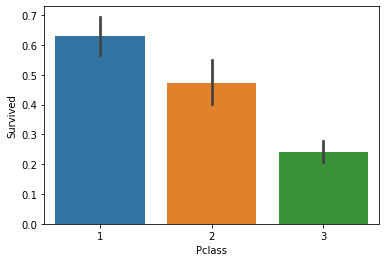

Valores Distintos: 
3    491
1    216
2    184
Name: Pclass, dtype: int64
Valores Nuros: 0


In [113]:
exploration(df['Pclass'], df['Survived'])
statistic(df['Pclass'])

## Name 

- Procurando nomes mais comuns no dataset

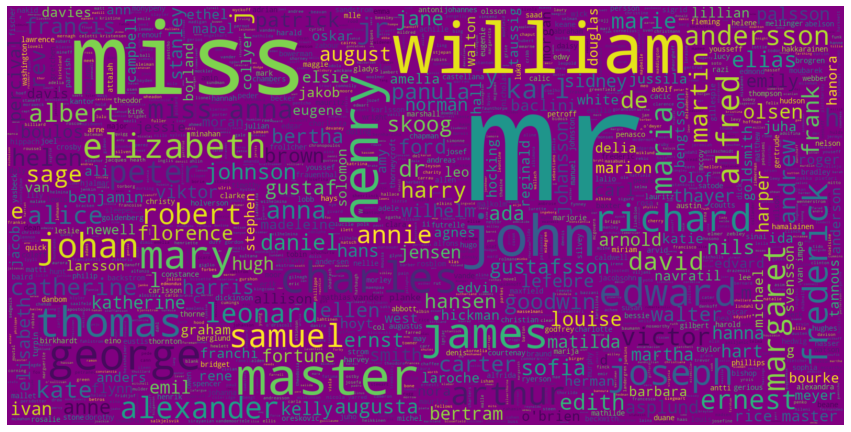

In [114]:
cloud(df['Name'])

In [115]:
for x in df[df["Name"].notnull()]['Name']:
    print(x, end="; ")

Braund, Mr. Owen Harris; Cumings, Mrs. John Bradley (Florence Briggs Thayer); Heikkinen, Miss. Laina; Futrelle, Mrs. Jacques Heath (Lily May Peel); Allen, Mr. William Henry; Moran, Mr. James; McCarthy, Mr. Timothy J; Palsson, Master. Gosta Leonard; Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg); Nasser, Mrs. Nicholas (Adele Achem); Sandstrom, Miss. Marguerite Rut; Bonnell, Miss. Elizabeth; Saundercock, Mr. William Henry; Andersson, Mr. Anders Johan; Vestrom, Miss. Hulda Amanda Adolfina; Hewlett, Mrs. (Mary D Kingcome) ; Rice, Master. Eugene; Williams, Mr. Charles Eugene; Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele); Masselmani, Mrs. Fatima; Fynney, Mr. Joseph J; Beesley, Mr. Lawrence; McGowan, Miss. Anna "Annie"; Sloper, Mr. William Thompson; Palsson, Miss. Torborg Danira; Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson); Emir, Mr. Farred Chehab; Fortune, Mr. Charles Alexander; O'Dwyer, Miss. Ellen "Nellie"; Todoroff, Mr. Lalio; Uruchurtu, Don. Manuel E; Spencer,

## Sex

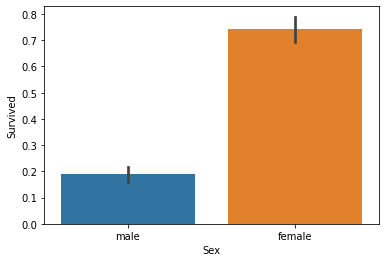

Valores Distintos: 
male      577
female    314
Name: Sex, dtype: int64
Valores Nuros: 0


In [116]:
exploration(df['Sex'], df['Survived'])
statistic(df['Sex'])

## Age

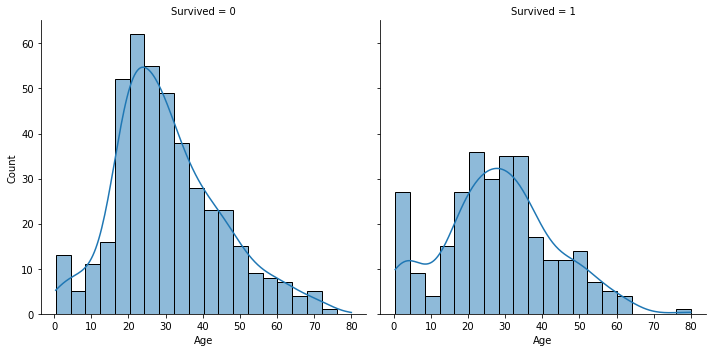

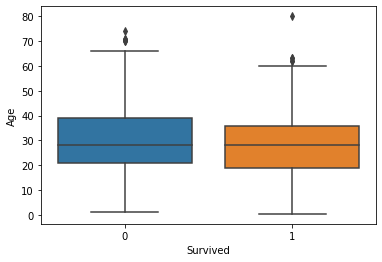

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64
Valores Nulos: 177


In [117]:
exploration(df['Age'], df['Survived'], cat = False, box = True)
statistic(df['Age'], cat = False)

In [118]:
df[df['Age'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...
860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S


## SibSp

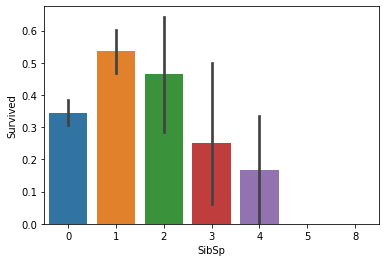

Valores Distintos: 
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
Valores Nuros: 0


In [119]:
exploration(df['SibSp'], df['Survived'])
statistic(df['SibSp'])

## Parch

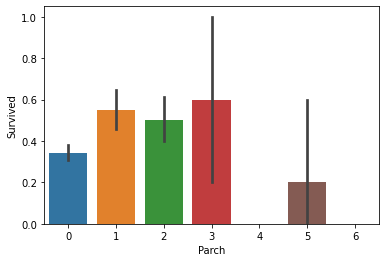

Valores Distintos: 
0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64
Valores Nuros: 0


In [120]:
exploration(df['Parch'], df['Survived'])
statistic(df['Parch'])

## Ticket

Valores Distintos: 
347082         7
1601           7
CA. 2343       7
347088         6
CA 2144        6
              ..
233866         1
2672           1
347464         1
244373         1
W.E.P. 5734    1
Name: Ticket, Length: 681, dtype: int64
Valores Nuros: 0


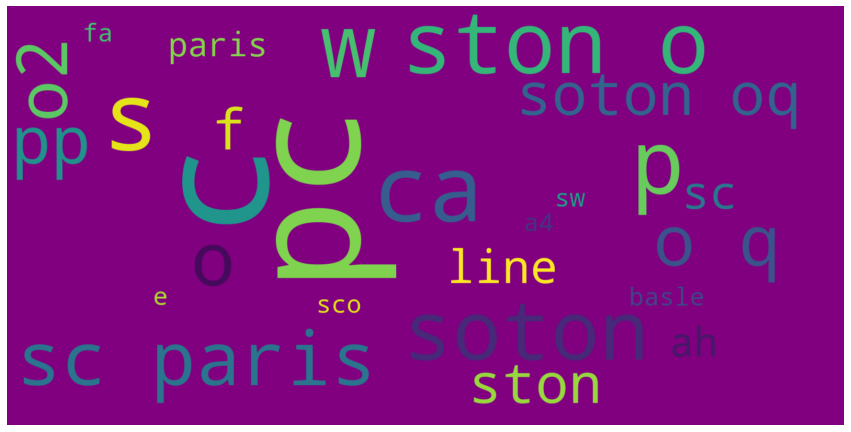

In [121]:
cloud(df['Ticket'])
statistic(df['Ticket'])

In [122]:
for x in df[df["Ticket"].notnull()]['Ticket']:
    print(x, end="; ")

A/5 21171; PC 17599; STON/O2. 3101282; 113803; 373450; 330877; 17463; 349909; 347742; 237736; PP 9549; 113783; A/5. 2151; 347082; 350406; 248706; 382652; 244373; 345763; 2649; 239865; 248698; 330923; 113788; 349909; 347077; 2631; 19950; 330959; 349216; PC 17601; PC 17569; 335677; C.A. 24579; PC 17604; 113789; 2677; A./5. 2152; 345764; 2651; 7546; 11668; 349253; SC/Paris 2123; 330958; S.C./A.4. 23567; 370371; 14311; 2662; 349237; 3101295; A/4. 39886; PC 17572; 2926; 113509; 19947; C.A. 31026; 2697; C.A. 34651; CA 2144; 2669; 113572; 36973; 347088; PC 17605; 2661; C.A. 29395; S.P. 3464; 3101281; 315151; C.A. 33111; CA 2144; S.O.C. 14879; 2680; 1601; 348123; 349208; 374746; 248738; 364516; 345767; 345779; 330932; 113059; SO/C 14885; 3101278; W./C. 6608; SOTON/OQ 392086; 19950; 343275; 343276; 347466; W.E.P. 5734; C.A. 2315; 364500; 374910; PC 17754; PC 17759; 231919; 244367; 349245; 349215; 35281; 7540; 3101276; 349207; 343120; 312991; 349249; 371110; 110465; 2665; 324669; 4136; 2627; STO

## Fare

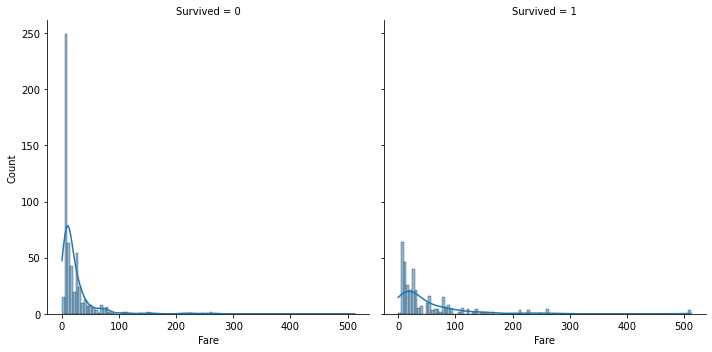

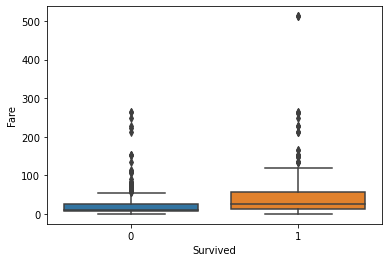

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64
Valores Nulos: 0


In [123]:
exploration(df.Fare, df.Survived, cat = False, box = True)
statistic(df['Fare'], cat = False)

## Cabin

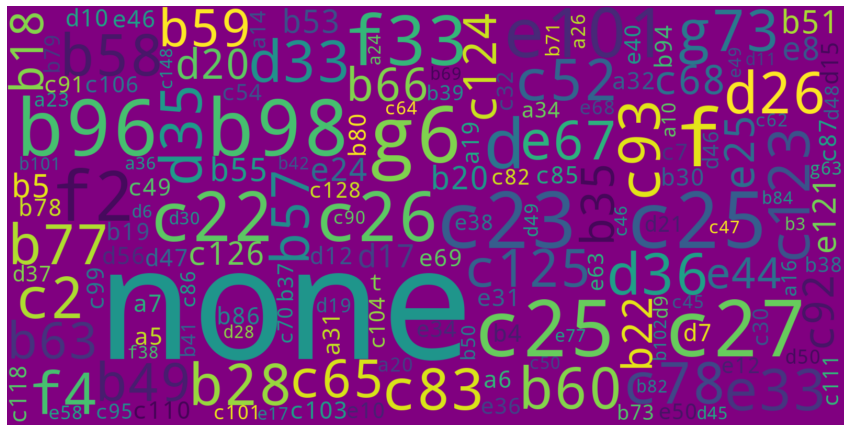

In [124]:
temp = df.Cabin.fillna(value="None")
cloud(temp)

In [125]:
for x in df[df["Cabin"].notnull()]['Cabin']:
    print(x, end="; ")

C85; C123; E46; G6; C103; D56; A6; C23 C25 C27; B78; D33; B30; C52; B28; C83; F33; F G73; C23 C25 C27; E31; A5; D10 D12; D26; C110; B58 B60; E101; D26; F E69; D47; C123; B86; F2; C2; E33; B19; A7; C49; F4; A32; F2; B4; B80; G6; A31; D36; D15; C93; C83; C78; D35; G6; C87; B77; E67; B94; C125; C99; C118; D7; A19; B49; D; C22 C26; C106; B58 B60; E101; C22 C26; C65; E36; C54; B57 B59 B63 B66; C7; E34; C32; D; B18; C124; C91; C2; E40; T; F2; C23 C25 C27; F33; C128; E33; D37; B35; E50; C82; B96 B98; D36; G6; C78; E10; C52; E44; B96 B98; C23 C25 C27; A34; C104; C111; C92; E38; D21; E12; E63; D; A14; B49; C93; B37; C30; D20; C22 C26; B79; C65; E25; D46; F33; B73; B18; C95; B38; B39; B22; C86; C70; A16; E67; C101; E25; E44; C68; A10; E68; B41; D20; A20; C125; F4; D19; D50; D9; A23; B50; B35; D33; A26; D48; E58; C126; B71; B51 B53 B55; D49; B5; B20; C68; F G63; C62 C64; E24; E24; C90; C124; C126; F G73; C45; E101; E8; B5; B101; D45; C46; B57 B59 B63 B66; B22; D30; E121; B77; B96 B98; D11; E77; F

## Embarked

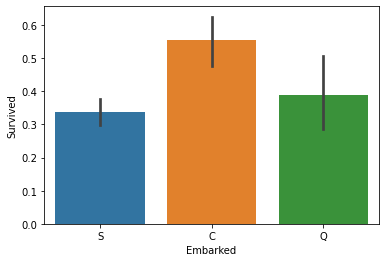

Valores Distintos: 
S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64
Valores Nuros: 2


In [126]:
exploration(df.Embarked, df.Survived)
statistic(df['Embarked'])

# Observações Iniciais

- Colunas com valores Nulos
    - Age         177
    - Cabin       687
    - Embarked      2
- Primeira Classe sobreviveram em média mais que as demais classes
- Nomes possuem tratamento social como Mr, Miss, Mrs, e outros
- Crianças com menos de 10 anos sobreviveram me média mais que as demais idades. 
- Aqueles que possuem um marido ou irmãos possuem mais chance de sobreviver. 
- Aqueles que tinha 2 parentes como pais ou filhos possuem mais chance de sobreviver
- Aparentemente aqueles com um tarifa mais elevada possuem uma pequena chance a mais de sobreviver. 
- Cabines e Tickets precisam de tratamento para uma exploração mais detalhada
- As pessoas que embarcaram no C possuem mais chance de sobreviver que os passageiros que embarcaram no ponto S

# Análise dados de teste

In [127]:
valid = pd.read_csv("dataset/test.csv", index_col = "PassengerId")
valid.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [130]:
statistic(valid.Embarked)

Valores Distintos: 
S    270
C    102
Q     46
Name: Embarked, dtype: int64
Valores Nuros: 0


In [131]:
statistic(valid.Cabin)

Valores Distintos: 
NaN                327
B57 B59 B63 B66      3
C116                 2
C78                  2
A34                  2
                  ... 
B11                  1
C46                  1
F E57                1
C62 C64              1
D30                  1
Name: Cabin, Length: 77, dtype: int64
Valores Nuros: 327


In [132]:
statistic(valid.Fare, cat = False)

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64
Valores Nulos: 1


In [133]:
statistic(valid.Ticket)

Valores Distintos: 
PC 17608              5
CA. 2343              4
113503                4
347077                3
220845                3
                     ..
371362                1
345775                1
SOTON/O.Q. 3101263    1
SC/Paris 2123         1
19924                 1
Name: Ticket, Length: 363, dtype: int64
Valores Nuros: 0


In [134]:
statistic(valid.Parch)

Valores Distintos: 
0    324
1     52
2     33
3      3
4      2
9      2
5      1
6      1
Name: Parch, dtype: int64
Valores Nuros: 0


In [135]:
statistic(valid.SibSp)

Valores Distintos: 
0    283
1    110
2     14
3      4
4      4
8      2
5      1
Name: SibSp, dtype: int64
Valores Nuros: 0


In [136]:
statistic(valid.Sex)

Valores Distintos: 
male      266
female    152
Name: Sex, dtype: int64
Valores Nuros: 0


In [137]:
statistic(valid.Name)

Valores Distintos: 
Phillips, Miss. Alice Frances Louisa             1
O'Connor, Mr. Patrick                            1
Lennon, Miss. Mary                               1
McCoy, Miss. Alicia                              1
Storey, Mr. Thomas                               1
                                                ..
Rheims, Mr. George Alexander Lucien              1
Clark, Mrs. Walter Miller (Virginia McDowell)    1
Andrew, Mr. Frank Thomas                         1
Andersson, Miss. Ida Augusta Margareta           1
Wirz, Mr. Albert                                 1
Name: Name, Length: 418, dtype: int64
Valores Nuros: 0


In [138]:
statistic(valid.Age, cat = False)

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64
Valores Nulos: 86


In [139]:
statistic(valid.Pclass)

Valores Distintos: 
3    218
1    107
2     93
Name: Pclass, dtype: int64
Valores Nuros: 0
